In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline


In [2]:
Train=pd.read_csv('/content/Loan Prediction.csv')

In [3]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
Train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

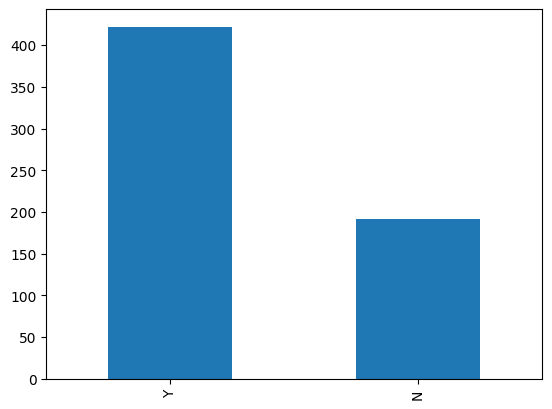

In [5]:
Train['Loan_Status'].value_counts().plot.bar()

In [6]:
Train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:

Train['Gender'].fillna(Train['Gender'].mode()[0], inplace=True)
Train['Married'].fillna(Train['Married'].mode()[0], inplace=True)
Train['Dependents'].fillna(Train['Dependents'].mode()[0], inplace=True)
Train['Self_Employed'].fillna(Train['Self_Employed'].mode()[0], inplace=True)
Train['Credit_History'].fillna(Train['Credit_History'].mode()[0], inplace=True)


In [8]:
Train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
Train['LoanAmount'].fillna(Train['LoanAmount'].median(), inplace=True)
Train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
Train['Loan_Amount_Term'].fillna(Train['Loan_Amount_Term'].mode()[0], inplace=True)
Train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

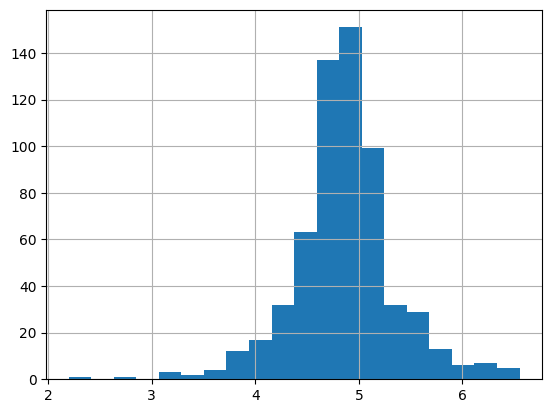

In [12]:
Train['LoanAmount_log'] = np.log(Train['LoanAmount'])
Train['LoanAmount_log'].hist(bins=20)
Train['Loan_Status'] = Train['Loan_Status']

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Train['Gender']	= label_encoder.fit_transform(Train['Gender'])
Train['Married']	= label_encoder.fit_transform(Train['Married'])
Train['Education']	=	label_encoder.fit_transform(Train['Education'])
Train['Self_Employed']	= label_encoder.fit_transform(Train['Self_Employed'])
Train['Property_Area']	=	label_encoder.fit_transform(Train['Property_Area'])
Train['Loan_Status']=	label_encoder.fit_transform(Train['Loan_Status'])

print(Train.head())


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0         0.0          0              0   
1  LP001003       1        1         1.0          0              0   
2  LP001005       1        1         0.0          0              1   
3  LP001006       1        1         0.0          1              0   
4  LP001008       1        0         0.0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  LoanAmount_log  
0             1.0              2            1        4.852030  
1             1.0       

In [14]:
index = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log',
'Loan_Status',]


In [15]:
Train = Train[index]

In [16]:
X = Train.iloc[:, :-1].values
y = Train.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [18]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [22]:
from sklearn import tree
#Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
y_pred= classifier.predict(X_test)

In [20]:
y_pred = DT.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[ 32  28]
 [ 26 119]]


0.7365853658536585